TEST LOADER FOR PHOIBOS 150 DATA

Typical structure 
/2020/01 January/Day 10/Raw Data/8874

Withing the folder of the scan number there is an info.txt and a scan
In THE AVG FOLDER there is a set of images, averaged over every acquisition cycle
IN THE RAW FOLDER there are single acquisition cycles (difference: in EPFL we added the "save every n cycle function"
this RAW folder also contains a "LUT.txt" file

In [936]:
# modify this for intersystem compatibility
import os

#get current directory
workingdir=os.getcwd()
#print(workingdir)
#navigate to example data
exampledatapath=os.path.realpath(os.path.join(workingdir, '..','tests\data\dataEPFL\\2020\\02 February\Day 17\Raw Data\9159'))
filelist=os.listdir(exampledatapath)
print("example data path= ",exampledatapath)
#this folders contains the AVG folder with the data, an info.txt vector and a scan vector
#filelist

#navigate to the image folder, for EPFL in the \AVG subfolder of the data (note that single scan cycles for partial load are in another subfolder - to be checked with Laurenz)
avgimagepath=os.path.realpath(os.path.join(workingdir, '..','tests\data\dataEPFL\\2020\\02 February\Day 17\Raw Data\9159\AVG'))
print("AVG images path= ",avgimagepath)
rawimagelist=os.listdir(avgimagepath)
#alternatively join the paths
#avgimagepath=os.path.join(exampledatapath,'AVG') 


example data path=  C:\Users\Michele\OneDrive\Documenti\GitHub\specsanalyzer-1\tests\data\dataEPFL\2020\02 February\Day 17\Raw Data\9159
AVG images path=  C:\Users\Michele\OneDrive\Documenti\GitHub\specsanalyzer-1\tests\data\dataEPFL\2020\02 February\Day 17\Raw Data\9159\AVG


The shape of the raw data is:  (256, 344)
512 688
1024 1376


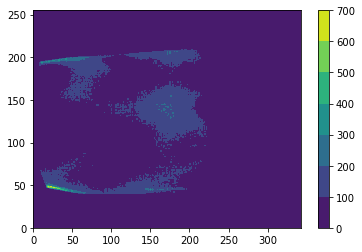

In [937]:
import numpy as np
import matplotlib.pyplot as plt
raw_image_name=os.path.join(avgimagepath,rawimagelist[0]) 
raw_data = np.loadtxt(raw_image_name, delimiter="\t")

h = plt.contourf(raw_data)
plt.colorbar()
print("The shape of the raw data is: ",raw_data.shape)
#plt.xlim(120,150)
#plt.ylim(150,200)


print(256*2,344*2)
print(256*4,344*4)

one of the first operations should be to filter the image to remove the grid via FFT filtering

In [938]:
#load the module and import functions for reading the parameter table from the calib2d file
from importlib import reload
import specsanalyzer.convert
reload(specsanalyzer.convert)    
from specsanalyzer.convert import get_damatrix_fromcalib2d
from specsanalyzer.convert import get_scanparameters




In [939]:
#GET THE CALIBRATION FILE NAME FROM THE EXAMPLE FOLDER
calib2dfilename=os.path.realpath(os.path.join(workingdir, '..','tests\data\dataEPFL\phoibosEPFL.txt'))
#GET THE INFO FILE NAME FROM THE EXAMPLE FOLDER, SCAN 9159
#navigate to example data
exampledatapath=os.path.realpath(os.path.join(workingdir, '..','tests\data\dataEPFL\\2020\\02 February\Day 17\Raw Data\9159'))
filelist=os.listdir(exampledatapath)
str_match = list(filter(lambda x: 'info.txt' in x, filelist))
infofilename=os.path.join(exampledatapath,str_match[0]) 

damatrix=get_damatrix_fromcalib2d(infofilename,calib2dfilename)
scanparameters=get_scanparameters(infofilename,calib2dfilename)
# now the calibration matrix contains the ainner in line1 , and the three 
# Da parameters, depending on the mode, some Das might be zero

In [940]:
scanparameters

{'ScanType': 'delay',
 'Averages': '10',
 'Repetitions': '1000',
 'LensMode': 'WideAngleMode',
 'VoltageRange': '400V',
 'Exposure': '200',
 'Gain': '0',
 'Binning': '2',
 'ROIbottom': '33',
 'ROItop': '1',
 'ROIright': '43',
 'ROIleft': '1',
 'DarkImg': '1',
 'KineticEnergy': '35.500000',
 'PassEnergy': '25.000000',
 'CoilCurrent': '3.000000',
 'WorkFunction': '0.000000',
 'DetectorVoltage': '1350.000000',
 'ScreenVoltage': '3000.000000',
 'ConversionVoltage': '-18.000000',
 'FocusDisplacement1': '0.001500',
 'FocusDisplacement2': '0.001500',
 'TimeZero': '281.044000',
 'eShift': [-0.05, 0.0, 0.05],
 'eRange': [-0.066, 0.066],
 'eGrid': [0.01],
 'aGrid': [1.0],
 'De1': [0.003],
 'aRange': [-15.0, 15.0],
 'ny_pixel': 1024,
 'nx_pixel': 1376,
 'pixelsize': 0.00645,
 'magnification': 4.54,
 'wf': 4.2,
 'aInner': 15.0,
 'damatrix': array([[ 0.699464  ,  0.719724  ,  0.717808  ],
        [ 0.01025504,  0.0765656 ,  0.157344  ],
        [-0.0285464 , -0.072264  , -0.1220944 ],
        [ 0.0

In [941]:
reload(specsanalyzer.convert)    
from specsanalyzer.convert import calculate_polynomial_coef_da

#we now have to convert the polynomial coeffiecients from the Da matrix
dapolymatrix=calculate_polynomial_coef_da(scanparameters)
scanparameters

{'ScanType': 'delay',
 'Averages': '10',
 'Repetitions': '1000',
 'LensMode': 'WideAngleMode',
 'VoltageRange': '400V',
 'Exposure': '200',
 'Gain': '0',
 'Binning': '2',
 'ROIbottom': '33',
 'ROItop': '1',
 'ROIright': '43',
 'ROIleft': '1',
 'DarkImg': '1',
 'KineticEnergy': '35.500000',
 'PassEnergy': '25.000000',
 'CoilCurrent': '3.000000',
 'WorkFunction': '0.000000',
 'DetectorVoltage': '1350.000000',
 'ScreenVoltage': '3000.000000',
 'ConversionVoltage': '-18.000000',
 'FocusDisplacement1': '0.001500',
 'FocusDisplacement2': '0.001500',
 'TimeZero': '281.044000',
 'eShift': [-0.05, 0.0, 0.05],
 'eRange': [-0.066, 0.066],
 'eGrid': [0.01],
 'aGrid': [1.0],
 'De1': [0.003],
 'aRange': [-15.0, 15.0],
 'ny_pixel': 1024,
 'nx_pixel': 1376,
 'pixelsize': 0.00645,
 'magnification': 4.54,
 'wf': 4.2,
 'aInner': 15.0,
 'damatrix': array([[ 0.699464  ,  0.719724  ,  0.717808  ],
        [ 0.01025504,  0.0765656 ,  0.157344  ],
        [-0.0285464 , -0.072264  , -0.1220944 ],
        [ 0.0

In [942]:
reload(specsanalyzer.convert)
from specsanalyzer.convert import mcp_position_mm

In [943]:
# For the example scan we have the following settings:
ek=float(scanparameters["KineticEnergy"])
ep=float(scanparameters["PassEnergy"])
erange=scanparameters["eRange"]
arange=scanparameters["aRange"]
angles=np.linspace(-20,20,1024)
energies=np.linspace(ek+ep*erange[0],ek+ep*erange[1],2048)
ainner=15
energymesh,anglemesh=np.meshgrid(energies,angles)

testimage=mcp_position_mm(energymesh,anglemesh,scanparameters)

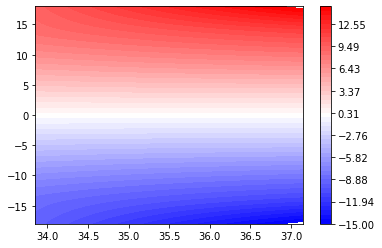

In [944]:
from matplotlib import cm

colorlevels=np.linspace(-15,15,50)

plt.contourf(energies,angles,testimage,cmap=cm.bwr,levels=colorlevels)
#plt.xlim(10,20)
plt.ylim(-18,18)
#plt.clim(0,5)
plt.colorbar()

#not sure if this is correct.. but better than before

In [945]:
reload(specsanalyzer.convert)
from specsanalyzer.convert import calculate_matrix_correction 
from specsanalyzer.convert import physical_unit_data

In [946]:
# For the example scan we have the following settings:
(ek_axis, angle_axis, angular_correction_matrix, e_correction,
         jacobian_determinant)=calculate_matrix_correction(scanparameters)

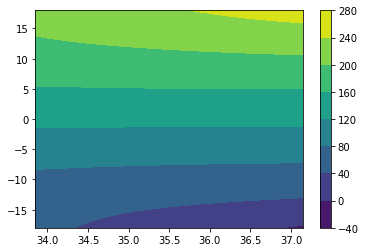

In [947]:
from matplotlib import cm

plt.contourf(ek_axis,angle_axis,angular_correction_matrix)
plt.colorbar()

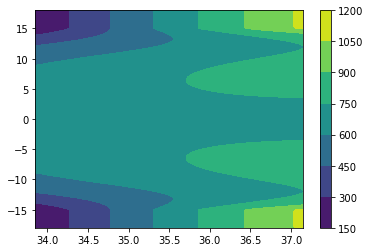

In [948]:
plt.contourf(ek_axis,angle_axis,jacobian_determinant)
plt.colorbar()

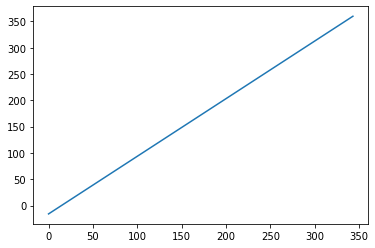

In [949]:
plt.plot(e_correction)

In [950]:
print(ek_axis.shape)
print(angle_axis.shape)
print(raw_data.shape)

corrected_data=physical_unit_data(raw_data,
                       angular_correction_matrix,
                       e_correction,
                       jacobian_determinant)

(344,)
(256,)
(256, 344)


In [951]:
  
ek_axis_m,angle_axis_m=np.meshgrid(ek_axis,angle_axis)
ek_axis_m[0,:].shape

(344,)

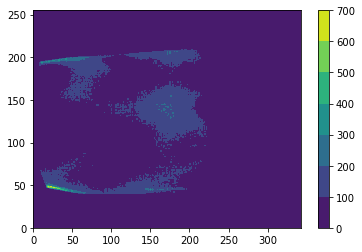

In [952]:
h = plt.contourf(raw_data)
plt.colorbar()

(344,)
(256,)
(256, 344)


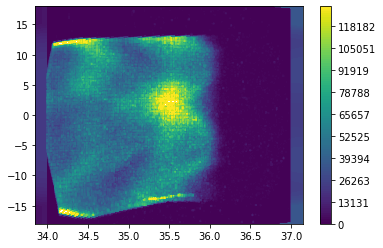

In [953]:
print(ek_axis.shape)
print(angle_axis.shape)
print(corrected_data.shape)
colorlevels=np.linspace(0,130000,100)
h = plt.contourf(ek_axis,angle_axis,corrected_data,levels=colorlevels)
plt.colorbar()
#plt.xlim(34,37)
#plt.ylim(-15,15)

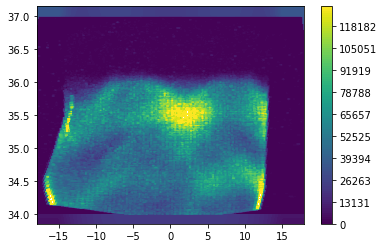

In [954]:
h = plt.contourf(angle_axis,ek_axis,corrected_data.transpose(),levels=colorlevels)
plt.colorbar()

In [956]:
from specsanalyzer.convert import convert_image 


In [957]:
%timeit corrected_data=convert_image(raw_image_name, infofilename, calib2dfilename)

73.1 ms ± 143 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


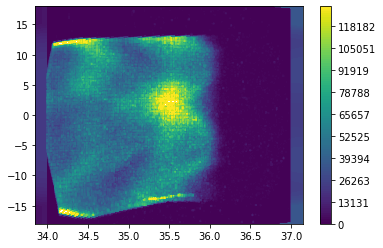

In [958]:
colorlevels=np.linspace(0,130000,100)
h = plt.contourf(ek_axis,angle_axis,corrected_data,levels=colorlevels)
plt.colorbar()
#plt.xlim(34,37)
#plt.ylim(-15,15)